# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  The call option becomes more valuable as the expiration $T$ grows further away, but the price is less sensitive to changes in $T$ when $T$ is large than when $T$ is small. The increase in value is because the option is currently out of the money, with the spot price at 100 and the strike price at 110. If the expiration date is farther away, the call option has more time to get into the money. But this is still true even if the call option started in the money, since with more time, it tends to go deeper into the money. Thus, more time until expiration always helps call options. This phenomenon is related to *theta decay*. According to the Black-Scholes model, if $t$ denotes the current time and $T$ denotes the expiration date, then the call option would today be priced at
$$
C = s N(d_1) - Ke^{-r(T-t)}N(d_2)
$$
where
$$
d_1 = \frac{\log\frac{s}{K}+\left(r+\frac{\sigma^2}{2}\right)(T-t)}{\sigma\sqrt{T-t}} \qquad \text{and} \qquad d_2 = d_1 - \sigma\sqrt{T-t}.
$$
Theta is the sensitivity of $C$ with respect to the current time $t$. It admits the closed form expression
$$
\Theta = \frac{\partial C}{\partial t} = -\frac{s\varphi(d_1)\sigma}{2\sqrt{T-t}} - rKe^{-r(T-t)}N(d_2)
$$
where $\varphi$ denotes the $\mathcal{N}(0,1)$ density. Note that $\Theta$ is negative. But there is a small difference between $\Theta$ and what is asked. Whereas $\Theta$ is the sensitivity with respect to the current time $t$, the question asks for the derivative with respect to the time until expiry, $T$. Inspecting the formula for $C$ above, we see that the two are related by
$$
\frac{\partial C}{\partial t} = -\frac{\partial C}{\partial T}.
$$
Also note that $\Theta \to 0$ as $T \to \infty$. This means then that $\frac{\partial C}{\partial T} \to 0$ as $T \to \infty$. Thus, the price is less sensitive to changes in $T$ when $T$ is large than when $T$ is small. Below, we compare the numerical approximation $\frac{C(T_n)-C(T_{n-1})}{T_n-T_{n-1}}$ against $\frac{\partial C}{\partial T}$.
- *Call Option – Spot Price Sensitivity:*  The call option becomes more valuable as the spot price increases, but the price is more sensitive to changes in $S_0$ when $S_0$ is large than when $S_0$ is small. The increase in value is because a higher spot price increases the probability that the option ends in the money. Mathematically, this is because the delta of a call option is always positive. We can compute
$$
\Delta = \frac{\partial C}{\partial S} = N(d_1) > 0
$$
Note that $\Delta \uparrow 1$ as $S_0 \to \infty$. Thus, the call option's prices are more sensitive to changes in $S_0$ when $S_0$ is large than when $S_0$ is small.
- *Put Option – Time Sensitivity:*  The trend is similar to that of a call option, and we can explain this with put-call parity, which states that
$$
P+S = C + Ke^{-r(T-t)}
$$
Taking partial derivatives with respect to $T$, we find
$$
\frac{\partial P}{\partial T} = \frac{\partial C}{\partial T} - Kre^{-r(T-t)}
$$
Note that the difference $Kre^{-r(T-t)}$ is always positive but decreases to $0$ as $T\to\infty$.
- *Put Option – Spot Price Sensitivity:*  The trend is opposite to that of a call option. The put option loses value as the spot price increases, but the price is less sensitive to changes when the spot price is large than what it is small. This is again explainable by the put-call parity $P+S = C + Ke^{-r(T-t)}$. Taking derivatives with respect to $S$, we find
$$
\frac{\partial P}{\partial S} + 1= \frac{\partial C}{\partial S} \Longrightarrow \frac{\partial P}{\partial S} = N(d_1) - 1
$$
Thus $\frac{\partial P}{\partial S} \uparrow 0$ as $S \to \infty$, while $\frac{\partial P}{\partial S} \downarrow -1$ as $S \to 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

In [2]:
def bs_call_theta(S0, K, sigma, T=1, r=0):
    """
    Description:
    
    Computes the theta of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Theta
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -S0*norm.pdf(d1)*sigma / (2 * np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
def bs_call_delta(S0, K, sigma, T=1, r=0):
    """
    Description:
    
    Computes the Delta of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Delta
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*T)/(sigma*np.sqrt(T))
    return norm.cdf(d1)

## Call Option – Spot Price Sensitivity

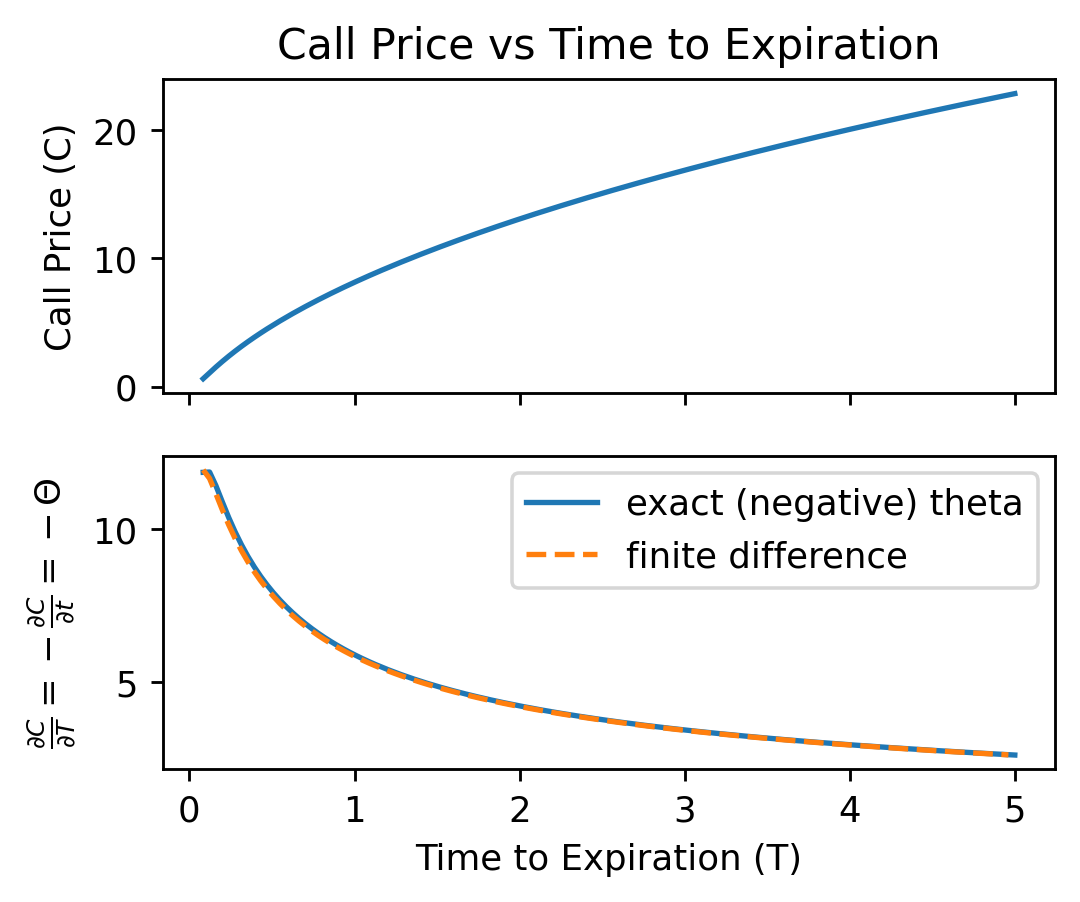

In [8]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 128)
dt = times[1] - times[0]
C = bs_call(S0,K,sigma,times)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.5,3.5), dpi = 256, sharex = True)

ax[0].set_title('Call Price vs Time to Expiration')
ax[0].plot(times, C)
ax[0].set_ylabel('Call Price (C)')
ax[1].plot(times, -bs_call_theta(S0, K, sigma, times), label = 'exact (negative) theta')
ax[1].plot(times[:-1], np.diff(C) / dt, '--', label = 'finite difference')
ax[1].set_xlabel('Time to Expiration (T)')
ax[1].set_ylabel(r'$\frac{\partial C}{\partial T} = -\frac{\partial C}{\partial t}= -\Theta $')
ax[1].legend()
fig.savefig('fig3.jpeg', transparent = False, bbox_inches = 'tight');

## Call Option – Spot Price Sensitivity

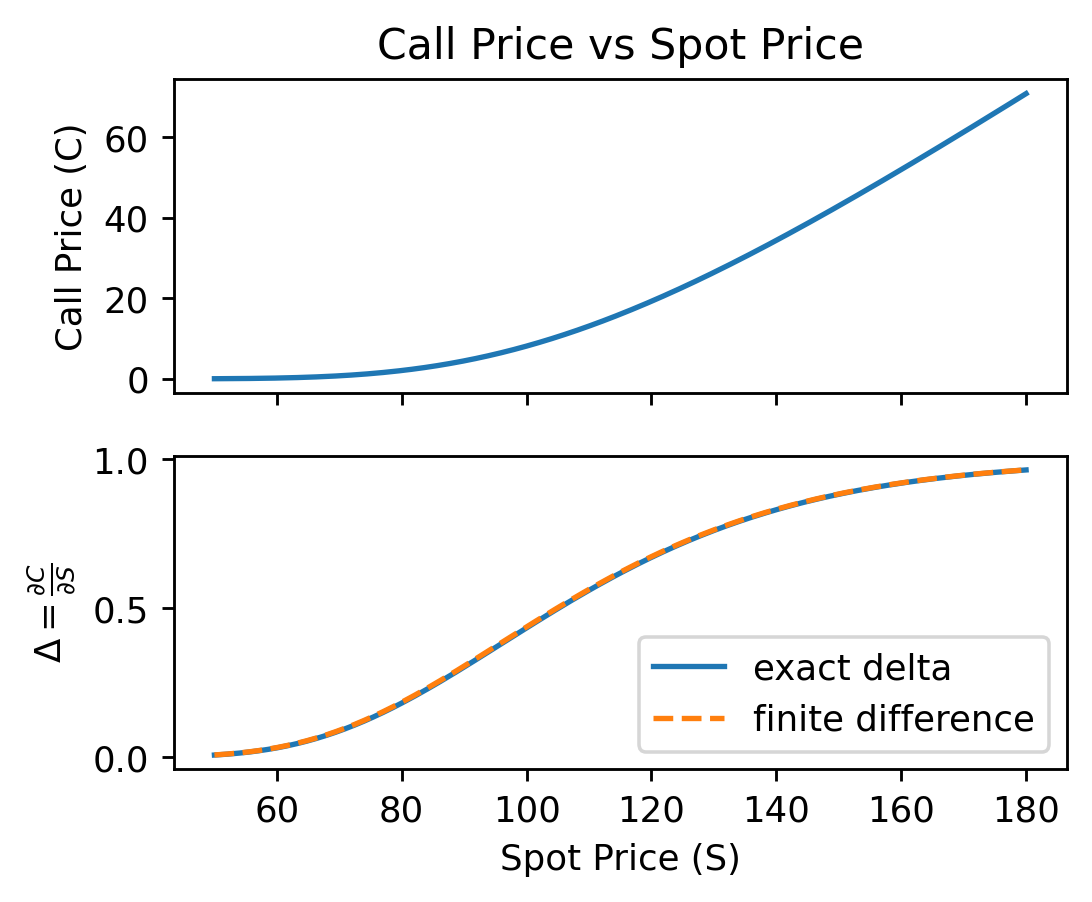

In [5]:
spot_prices = np.linspace(50,180,256)
dS = spot_prices[1] - spot_prices[0]
K = 110
sigma = .3
C = bs_call(spot_prices,K,sigma,t=1)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.5,3.5), dpi = 256, sharex = True)

ax[0].set_title('Call Price vs Spot Price')
ax[0].plot(spot_prices, C)
ax[0].set_ylabel('Call Price (C)')

ax[1].plot(spot_prices, bs_call_delta(spot_prices,K,sigma), label = 'exact delta')
ax[1].plot(spot_prices[:-1], np.diff(C) / dS, '--', label = 'finite difference')
ax[1].set_xlabel('Spot Price (S)')
ax[1].set_ylabel(r'$\Delta = \frac{\partial C}{\partial S}$')
ax[1].legend()

fig.savefig('fig4.jpeg', transparent = False, bbox_inches = 'tight');

## Put Option – Time Sensitivity

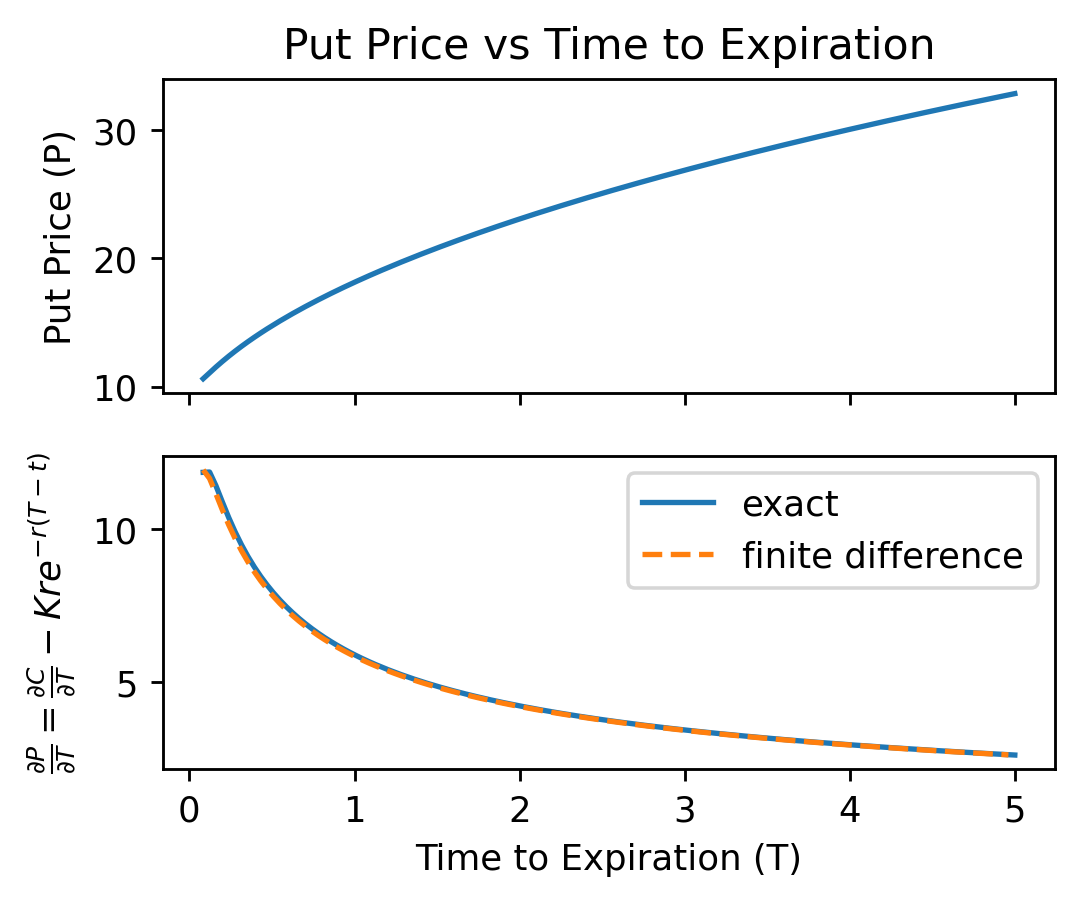

In [10]:
S0 = 100
K = 110
sigma = .3
T = 5
times = np.linspace(1/12, T, 128)
dt = times[1] - times[0]
P = bs_put(S0,K,sigma,times)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.5,3.5), dpi = 256, sharex = True)

ax[0].set_title('Put Price vs Time to Expiration')
ax[0].plot(times, P)
ax[0].set_ylabel('Put Price (P)')
ax[1].plot(times, -bs_call_theta(S0, K, sigma, times), label = 'exact')
ax[1].plot(times[:-1], np.diff(P) / dt, '--', label = 'finite difference')
ax[1].set_xlabel('Time to Expiration (T)')
ax[1].set_ylabel(r'$\frac{\partial P}{\partial T} = \frac{\partial C}{\partial T} -Kre^{-r(T-t)}$')
ax[1].legend()
fig.savefig('fig5.jpeg', transparent = False, bbox_inches = 'tight');

## Put Option – Spot Price Sensitivity

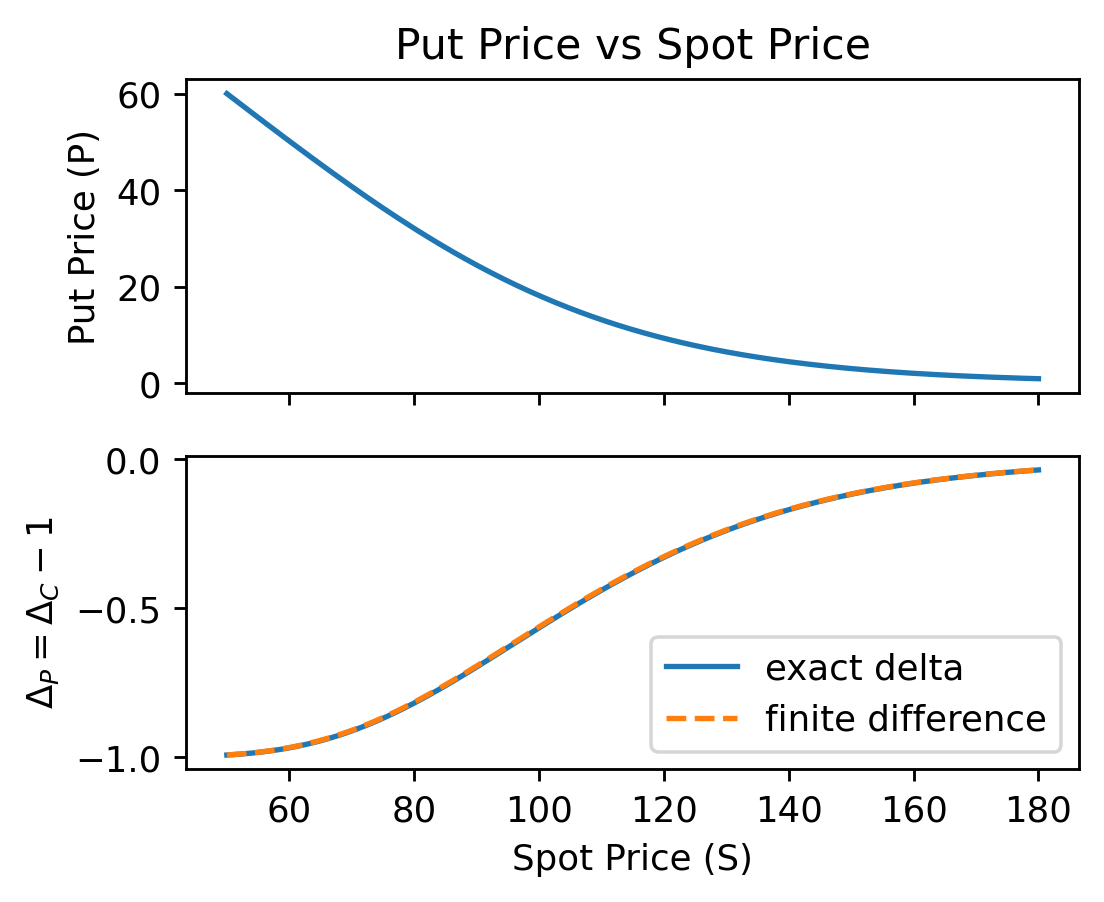

In [7]:
spot_prices = np.linspace(50,180,256)
dS = spot_prices[1] - spot_prices[0]
K = 110
sigma = .3
P = bs_put(spot_prices,K,sigma,t=1)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.5,3.5), dpi = 256, sharex = True)

ax[0].set_title('Put Price vs Spot Price')
ax[0].plot(spot_prices, P)
ax[0].set_ylabel('Put Price (P)')

ax[1].plot(spot_prices, bs_call_delta(spot_prices,K,sigma) - 1, label = 'exact delta')
ax[1].plot(spot_prices[:-1], np.diff(P) / dS, '--', label = 'finite difference')
ax[1].set_xlabel('Spot Price (S)')
ax[1].set_ylabel(r'$\Delta_P = \Delta_C - 1$')
ax[1].legend()

fig.savefig('fig6.jpeg', transparent = False, bbox_inches = 'tight');